In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance_matrix
from itertools import permutations, combinations
from math import comb
import numpy as np
from timeit import default_timer as timer
import sys
sys.path.insert(0, '/home/kurk/curse/filtration/graph_func.cpython-312-x86_64-linux-gnu.so')

import graph_func as gf
import importlib
importlib.reload(gf)
from timeit import default_timer as timer

from sklearn.neighbors import radius_neighbors_graph
import networkx as nx


print(gf.__file__)
print(gf.filtrate.__doc__)

/home/krakazabra/work/curse/NetworkAnalysislibpp/testing/graph_func.cpython-312-x86_64-linux-gnu.so
filtrate(A: numpy.ndarray[numpy.float64], n: int, p: numpy.ndarray[numpy.float64], threads: int) -> numpy.ndarray[numpy.float64]

filter complex



In [3]:
X = np.array([
    [0, 2.75], # 1
    [2, 2], # 2
    [3, 2.25], # 3
    [4, 4], #4
    [3.5, 0.75], #5
    [2.5, -0.25], #6
    [2.25, -2.25], #7
    [2.5, -4], #8
    [1, -3], #9
    [-1, -2.75], #10
    [-2.5, -1.0], #11
    [-4, 0.5], #12
    [-2, 1] #13
])

X = X + np.random.normal(0, 0.05, X.shape)
X

array([[ 0.06013875,  2.67724771],
       [ 1.98667329,  2.01568812],
       [ 2.89742388,  2.27432619],
       [ 4.07820523,  4.07367331],
       [ 3.481237  ,  0.71047011],
       [ 2.5281474 , -0.31455634],
       [ 2.26234588, -2.33640854],
       [ 2.46256391, -4.00404433],
       [ 0.99888904, -3.04680854],
       [-0.94495047, -2.74156635],
       [-2.53211903, -1.00610023],
       [-3.93629574,  0.53342692],
       [-1.97571134,  1.03952314]])

In [4]:
A = radius_neighbors_graph(X, 4.25, mode='distance', include_self=False).toarray() #.astype(int)
G = nx.from_numpy_array(A)
A

array([[0.        , 2.03695764, 2.86575168, 0.        , 3.94615349,
        3.87839634, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.61281981],
       [2.03695764, 0.        , 0.94676306, 2.93424759, 1.98426681,
        2.39232805, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.08085653],
       [2.86575168, 0.94676306, 0.        , 2.15218369, 1.66927637,
        2.61508659, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 2.93424759, 2.15218369, 0.        , 3.41577324,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.94615349, 1.98426681, 1.66927637, 3.41577324, 0.        ,
        1.3996639 , 3.28164061, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.87839634, 2.39232805, 2.61508659, 0.        , 1.3996639 ,
        0.        , 2.03924

In [5]:
_A = distance_matrix(X, X)
dm = gf.get_VR_from_dist_matrix(_A, 0, 3)
# dm.creat(A, 3)
# dm.as_list()
_A

13 13


array([[0.        , 2.03695764, 2.86575168, 4.25380567, 3.94615349,
        3.87839634, 5.47598988, 7.10009225, 5.80052343, 5.51123853,
        4.50409286, 4.53513574, 2.61281981],
       [2.03695764, 0.        , 0.94676306, 2.93424759, 1.98426681,
        2.39232805, 4.36081882, 6.03851395, 5.15796376, 5.58801288,
        5.43605453, 6.1056253 , 4.08085653],
       [2.86575168, 0.94676306, 0.        , 2.15218369, 1.66927637,
        2.61508659, 4.65426673, 6.29341239, 5.64968223, 6.31846647,
        6.34358997, 7.05198228, 5.02714486],
       [4.25380567, 2.93424759, 2.15218369, 0.        , 3.41577324,
        4.65394873, 6.662319  , 8.23770715, 7.7577993 , 8.46637967,
        8.33669515, 8.76159633, 6.77170386],
       [3.94615349, 1.98426681, 1.66927637, 3.41577324, 0.        ,
        1.3996639 , 3.28164061, 4.82331227, 4.50324264, 5.61317123,
        6.25356415, 7.41964529, 5.46686027],
       [3.87839634, 2.39232805, 2.61508659, 4.65394873, 1.3996639 ,
        0.        , 2.03924

In [6]:
def plot_core(G, K):

    def stack(idx):
        ret = np.empty((0, 2))
        for _id in idx:
            ret = np.vstack((ret, X[_id,:]))
        return ret

    max_dim_K = len(K)

    plt.figure(figsize=(17,4))

    plt.subplot(1, 4, 1)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title("Neighborhood graph$")

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    for i in range(len(X)):
        plt.annotate(str(i), (X[i][0], X[i][1]))

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    plt.subplot(1, 4, 3)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title("Vietoris-Rips complex$")

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    # plot triangles
    if max_dim_K >= 3:
        for triangle in K[2]:
            t = plt.Polygon(stack(triangle), color="blue", alpha=0.15)
            plt.gca().add_patch(t)

    # plot tetrahedrons
    if max_dim_K >= 4:
        for tetra in K[3]:
            tt = plt.Polygon(stack(tetra), color="red", alpha=0.15)
            plt.gca().add_patch(tt)

    plt.show()

In [7]:
epsilons = list(np.sort(A[np.tril(A).nonzero()]))
epsilons

[0.9467630607785772,
 1.399663902468287,
 1.4494796764058937,
 1.669276366757148,
 1.6796119723467904,
 1.7488980730925936,
 1.9676597333695898,
 1.984266807725027,
 2.0248517345615533,
 2.036957635757904,
 2.0392490661941567,
 2.0837120925360644,
 2.119944456990468,
 2.1521836944028685,
 2.3517964806148375,
 2.3923280484956964,
 2.6128198083970258,
 2.6150865929906773,
 2.8657516764915325,
 2.934247585582011,
 3.131107339742495,
 3.2327855923070903,
 3.2816406137180345,
 3.4157732352635244,
 3.633869130057494,
 3.6900708362796424,
 3.8783963409133033,
 3.9190694948875406,
 3.9461534930909252,
 4.0782972404847975,
 4.08085652982912,
 4.237072850289851]

13 13


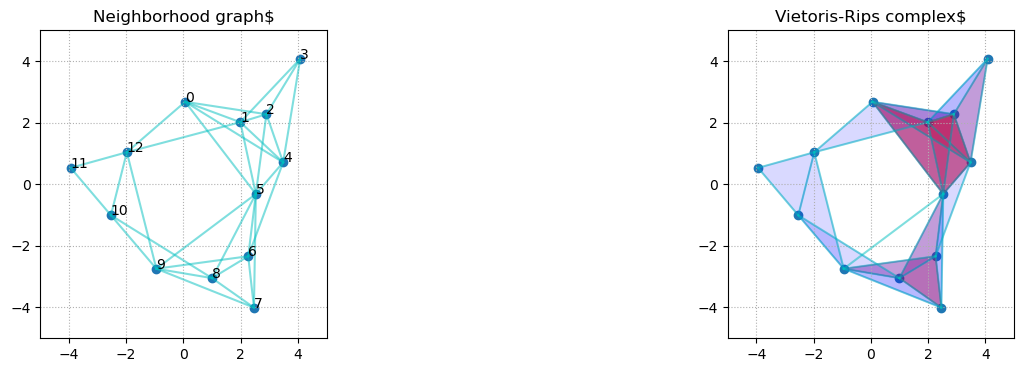

2


array([[0.        , 2.03695764, 2.86575168, 0.        , 3.94615349,
        3.87839634, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.61281981],
       [2.03695764, 0.        , 0.94676306, 2.93424759, 1.98426681,
        2.39232805, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.08085653],
       [2.86575168, 0.94676306, 0.        , 2.15218369, 1.66927637,
        2.61508659, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 2.93424759, 2.15218369, 0.        , 3.41577324,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.94615349, 1.98426681, 1.66927637, 3.41577324, 0.        ,
        1.3996639 , 3.28164061, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.87839634, 2.39232805, 2.61508659, 0.        , 1.3996639 ,
        0.        , 2.03924

In [8]:
_A = radius_neighbors_graph(X, epsilons[len(epsilons) - 1], mode='distance', include_self=False).toarray()
__A = distance_matrix(X, X)
__K = gf.get_VR_from_dist_matrix(__A, epsilons[len(epsilons) - 1], 4)
_K =  __K.as_list()
plot_core(nx.from_numpy_array(_A), _K)
print(__K.filtration(2)[5].dim())
__K.volume_of(__K.filtration(1)[5])
A

In [ ]:
__K = gf.get_Lp_from_coord_matrix(X, 2, 2, 4)
__K.as_list()

: 

VRC destructor
Graph with 13 nodes and 1 edges
13 2


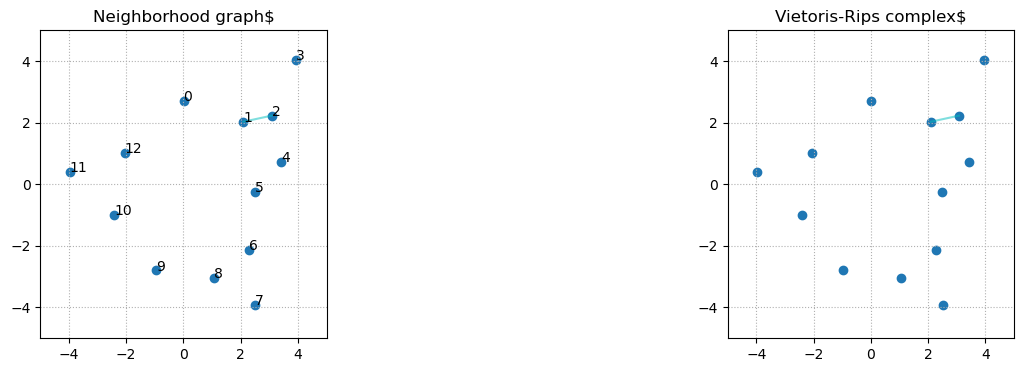

Graph with 13 nodes and 1 edges
13 2
VRC destructor


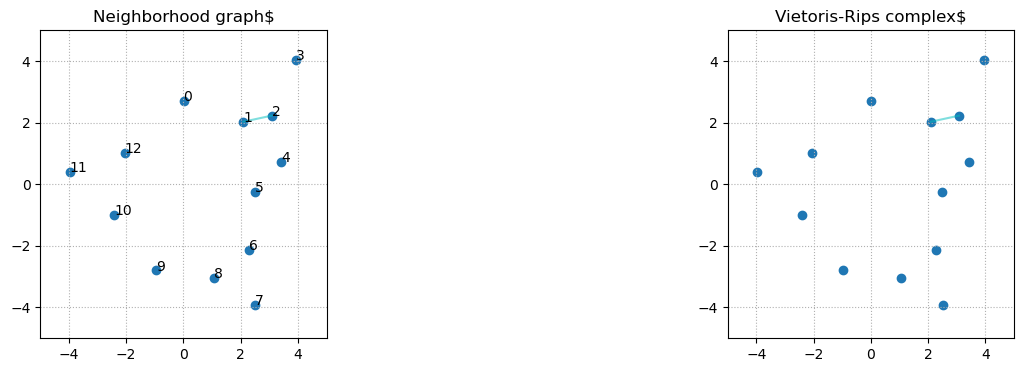

Graph with 13 nodes and 3 edges
13 2
VRC destructor


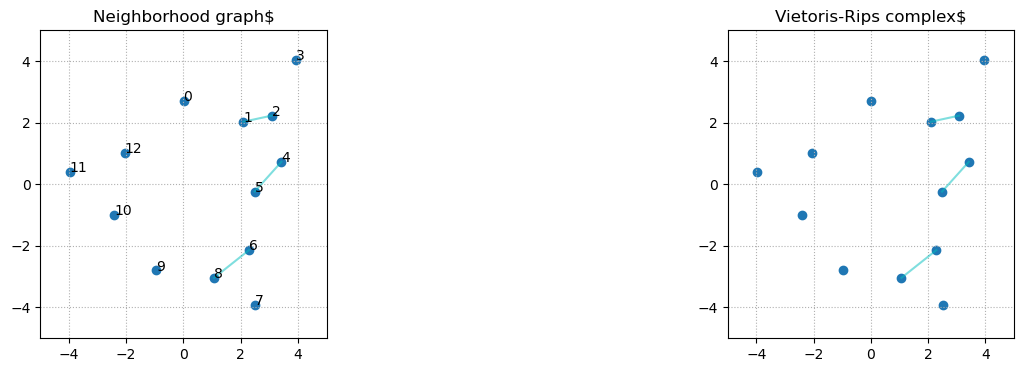

Graph with 13 nodes and 4 edges
13 2
VRC destructor


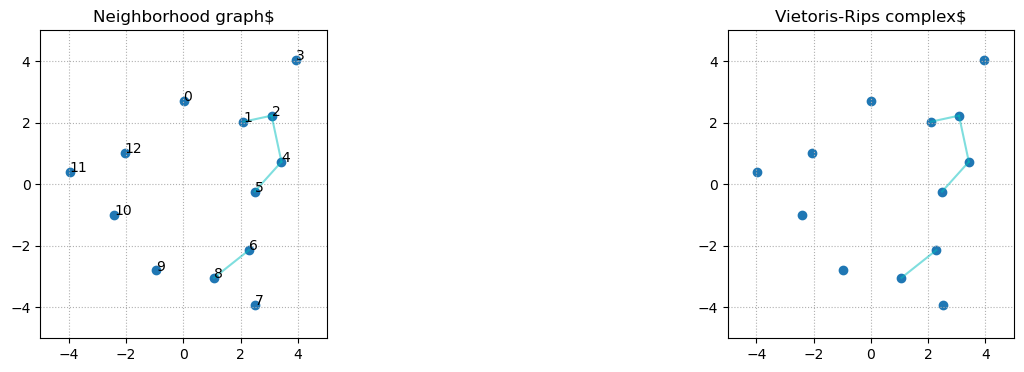

Graph with 13 nodes and 5 edges
13 2
VRC destructor


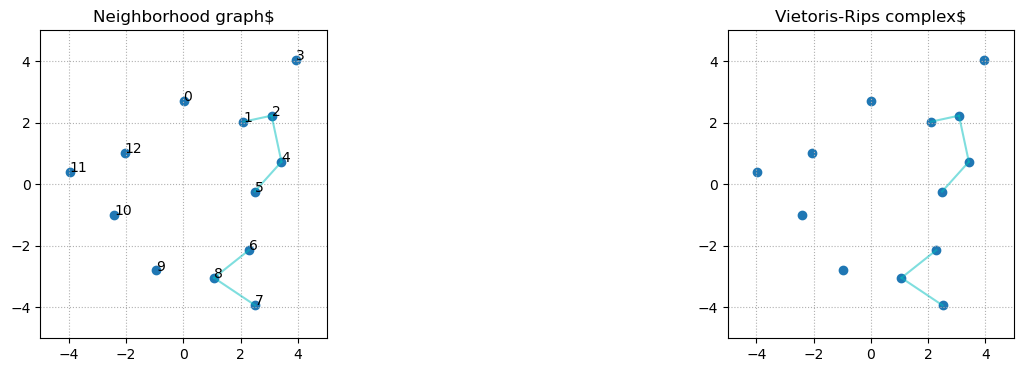

Graph with 13 nodes and 6 edges
13 2
VRC destructor


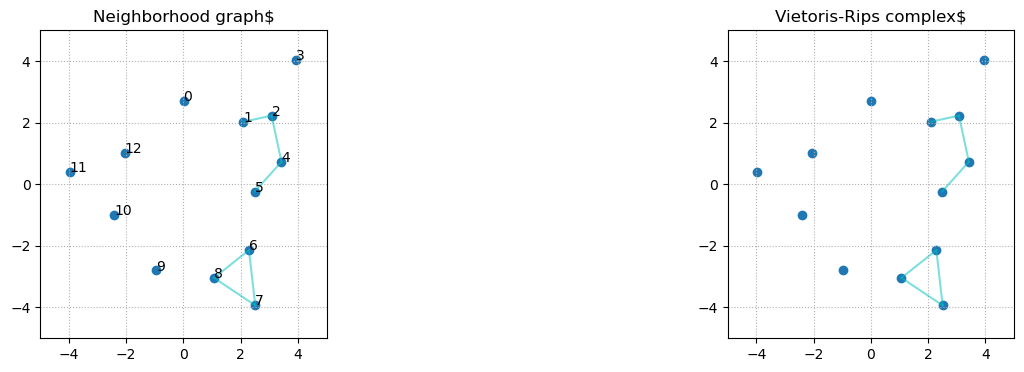

Graph with 13 nodes and 7 edges
13 2
VRC destructor


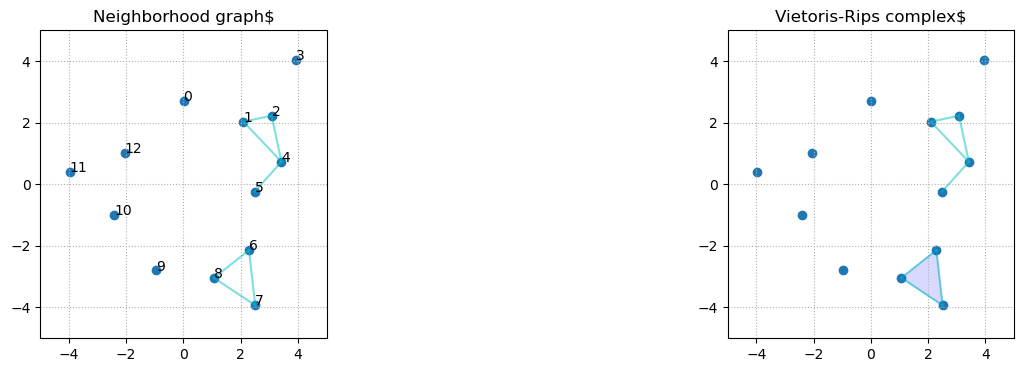

Graph with 13 nodes and 8 edges
13 2
VRC destructor


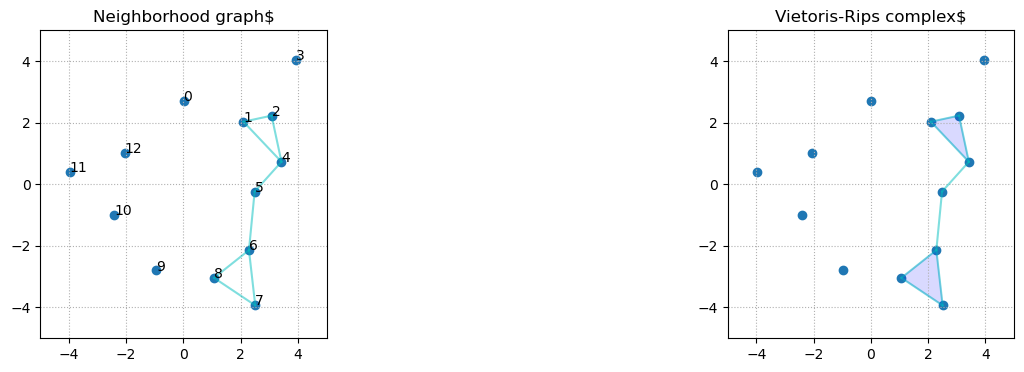

Graph with 13 nodes and 9 edges
13 2
VRC destructor


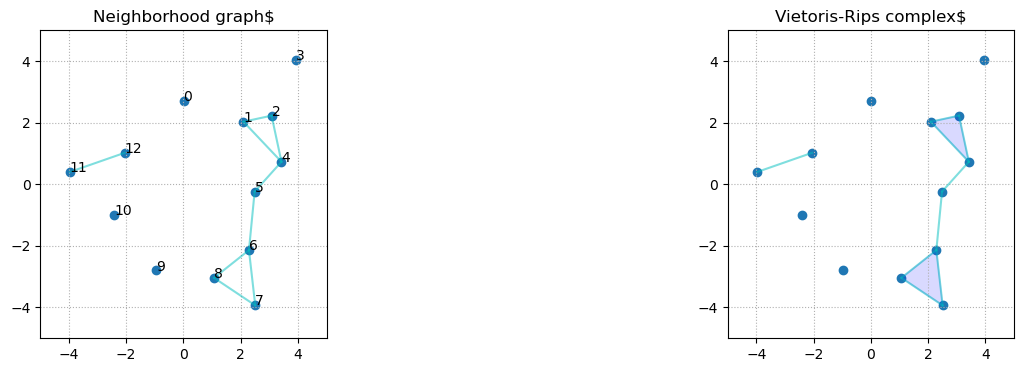

Graph with 13 nodes and 9 edges
13 2
VRC destructor


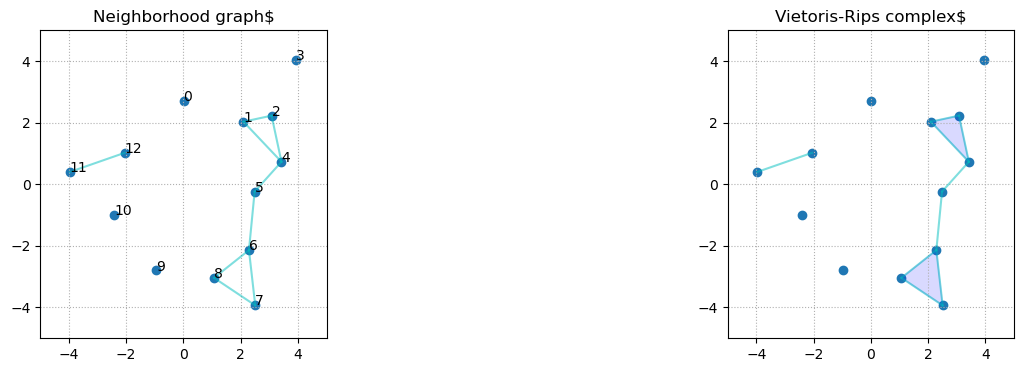

Graph with 13 nodes and 10 edges
13 2
VRC destructor


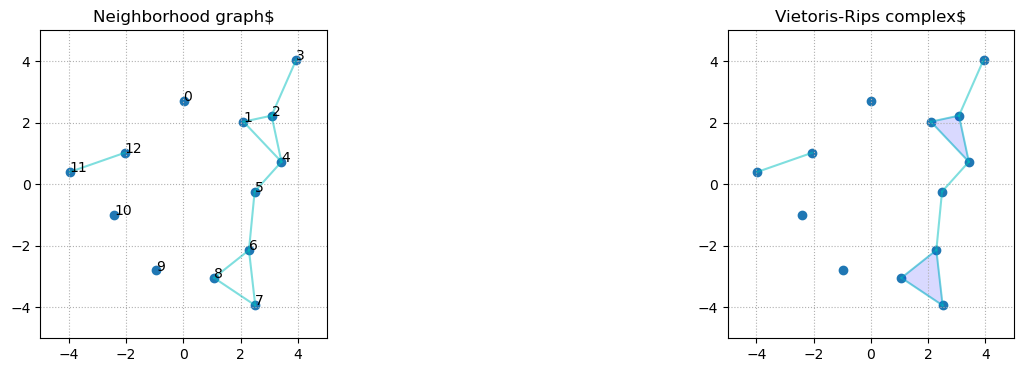

Graph with 13 nodes and 11 edges
13 2
VRC destructor


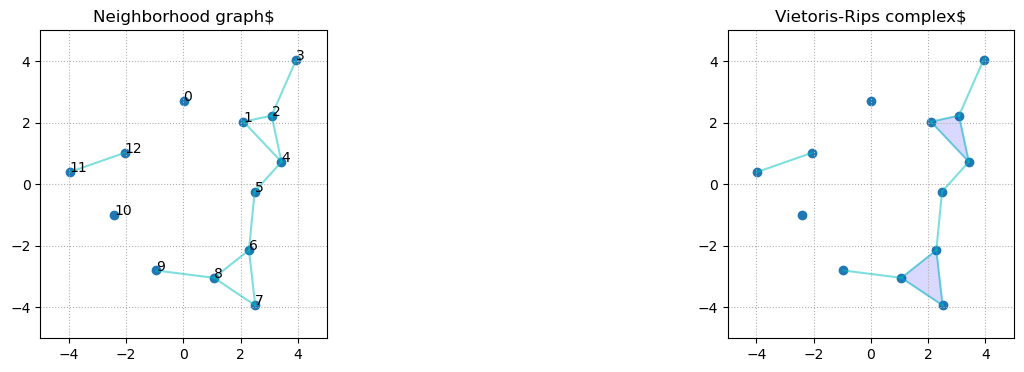

Graph with 13 nodes and 12 edges
13 2
VRC destructor


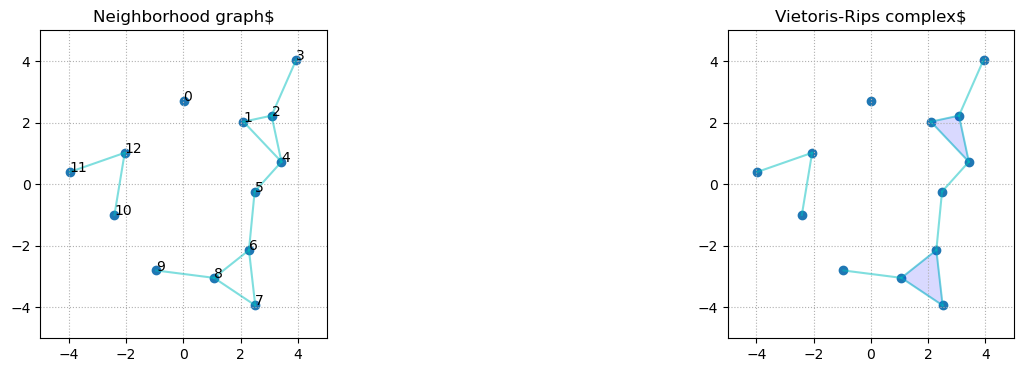

Graph with 13 nodes and 13 edges
13 2
VRC destructor


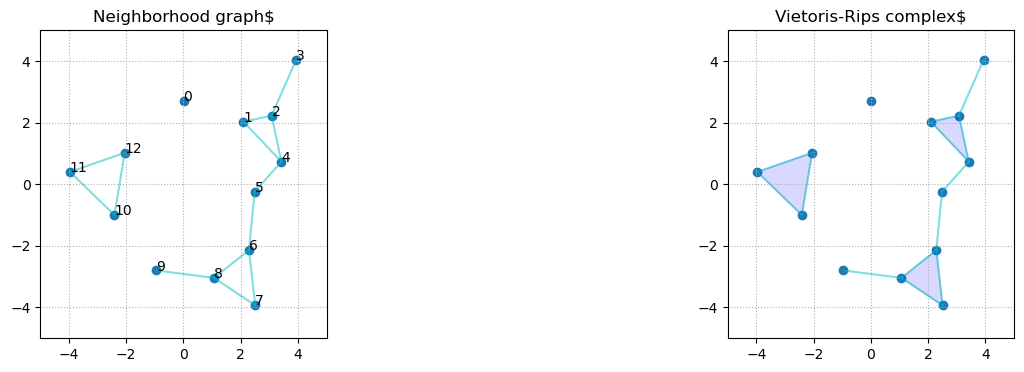

Graph with 13 nodes and 14 edges
13 2
VRC destructor


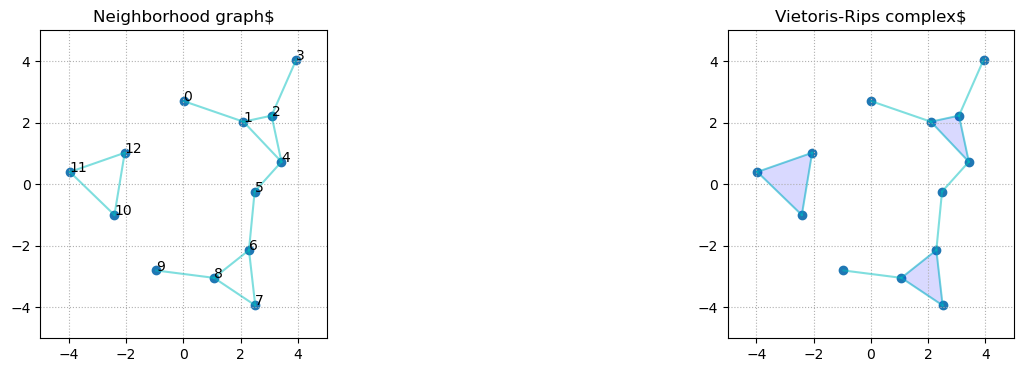

Graph with 13 nodes and 16 edges
13 2
VRC destructor


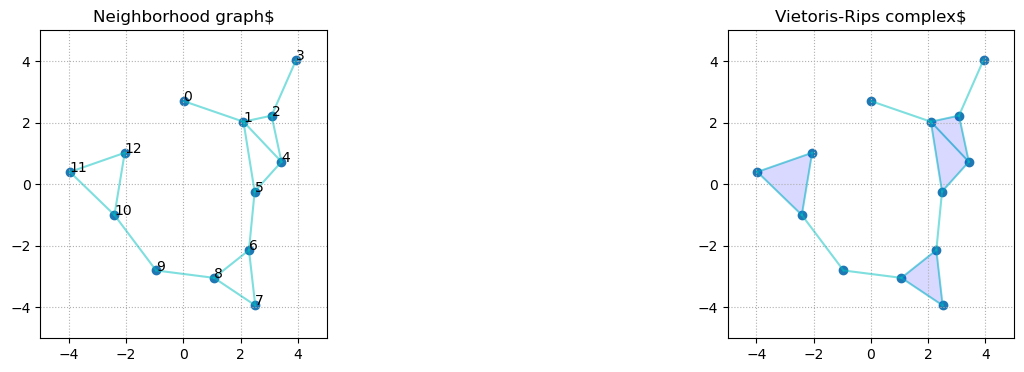

Graph with 13 nodes and 17 edges
13 2
VRC destructor


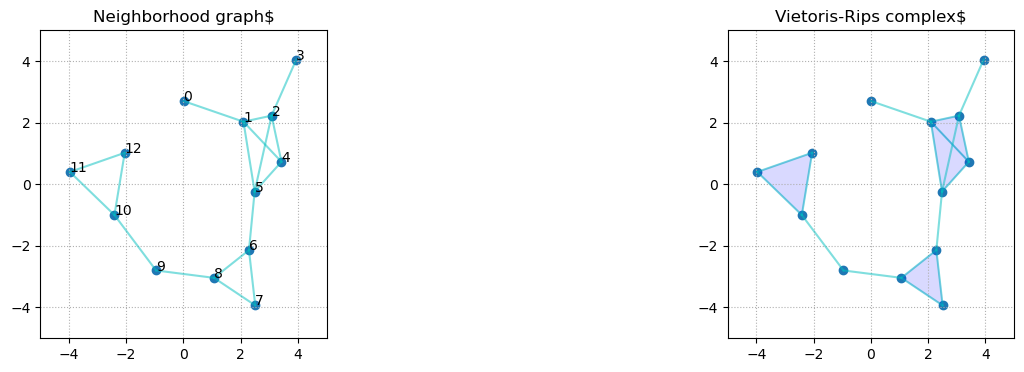

Graph with 13 nodes and 18 edges
13 2
VRC destructor


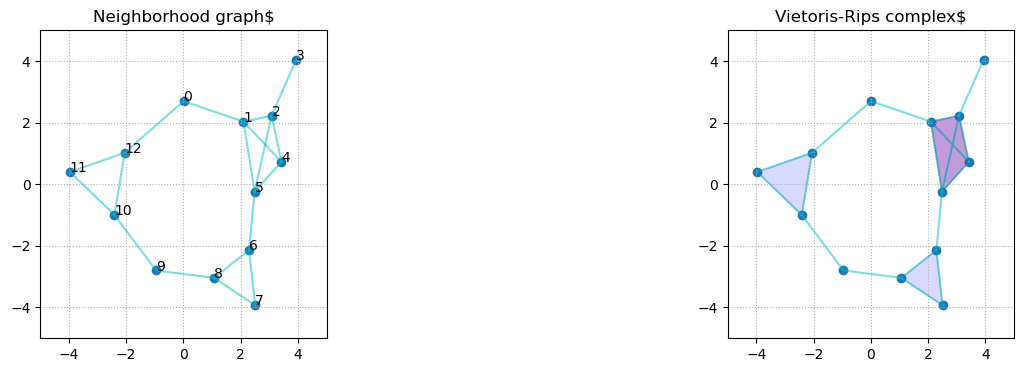

Graph with 13 nodes and 19 edges
13 2
VRC destructor


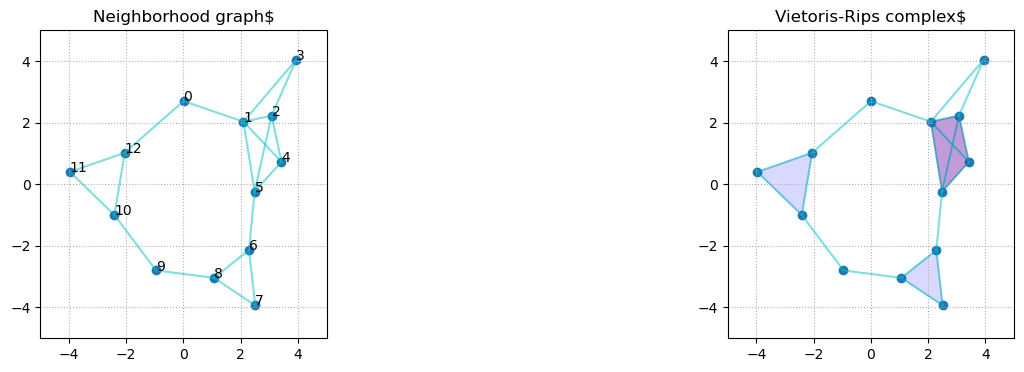

Graph with 13 nodes and 20 edges
13 2
VRC destructor


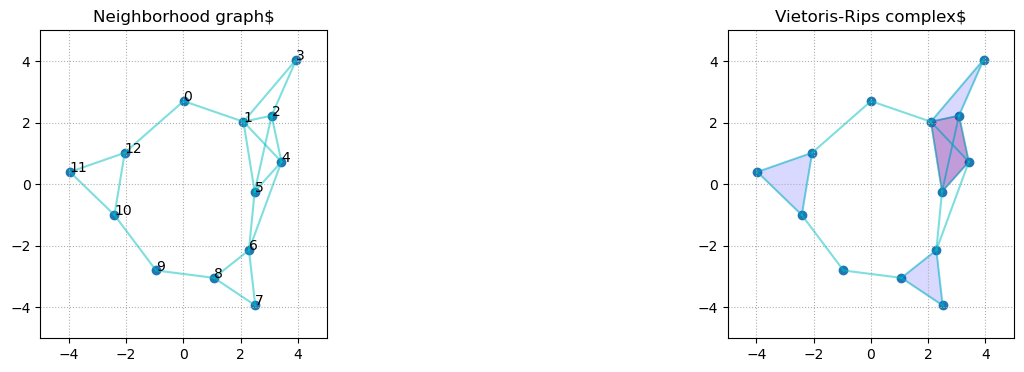

Graph with 13 nodes and 21 edges
13 2
VRC destructor


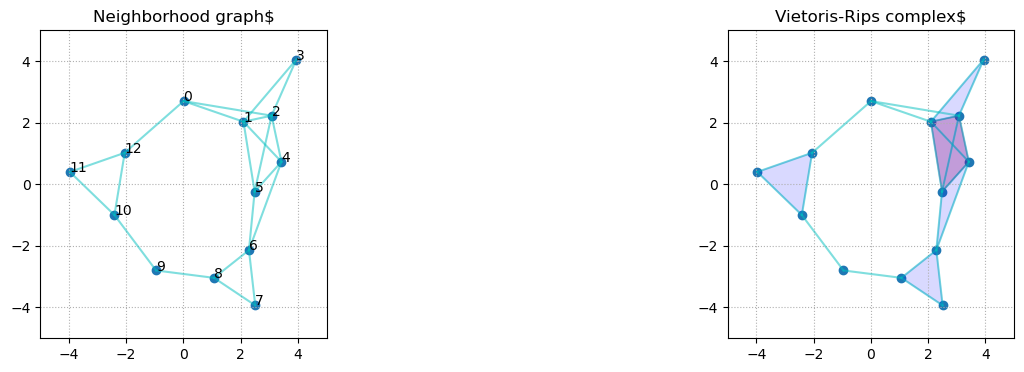

Graph with 13 nodes and 22 edges
13 2
VRC destructor


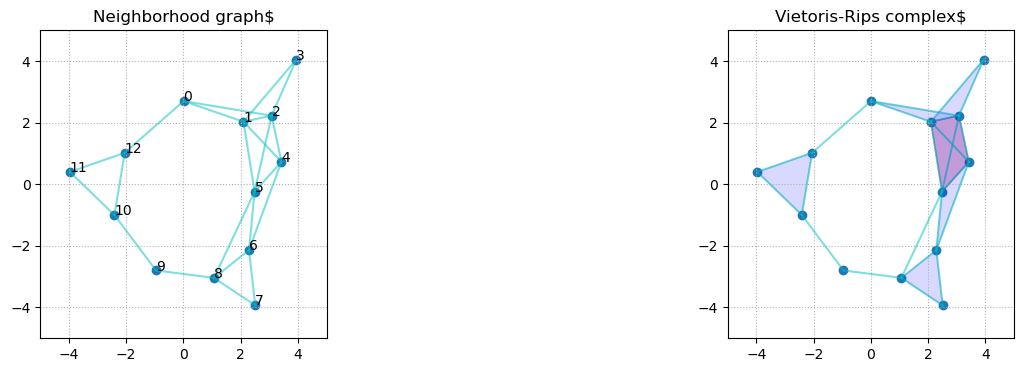

Graph with 13 nodes and 23 edges
13 2
VRC destructor


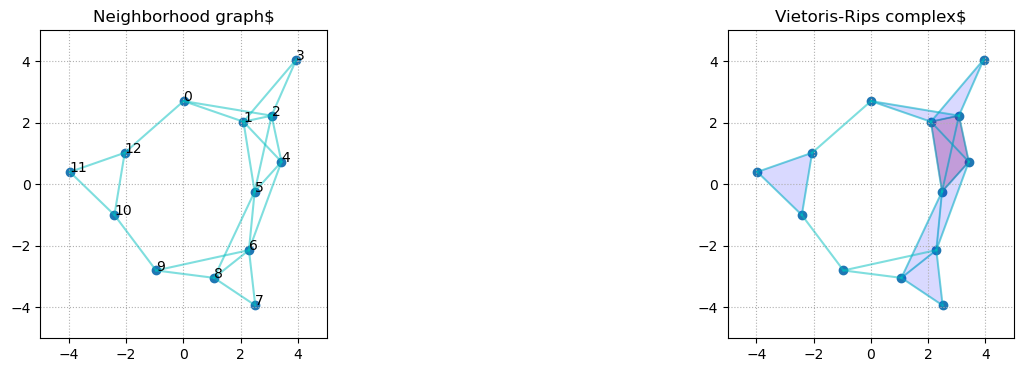

Graph with 13 nodes and 24 edges
13 2
VRC destructor


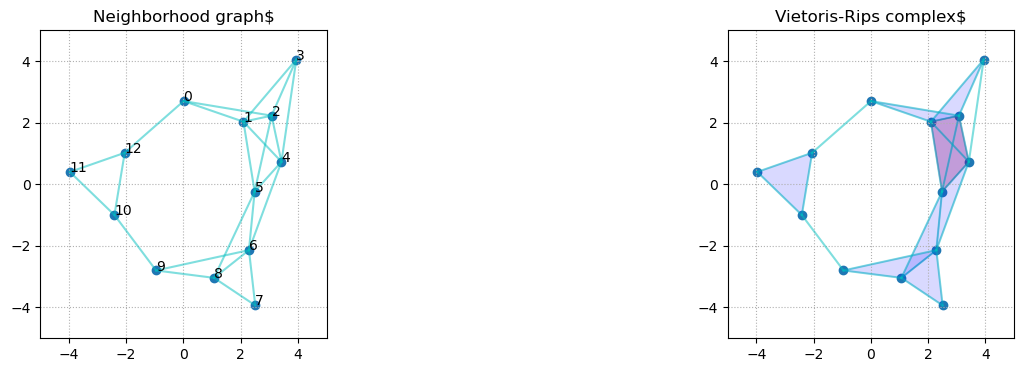

Graph with 13 nodes and 24 edges
13 2
VRC destructor


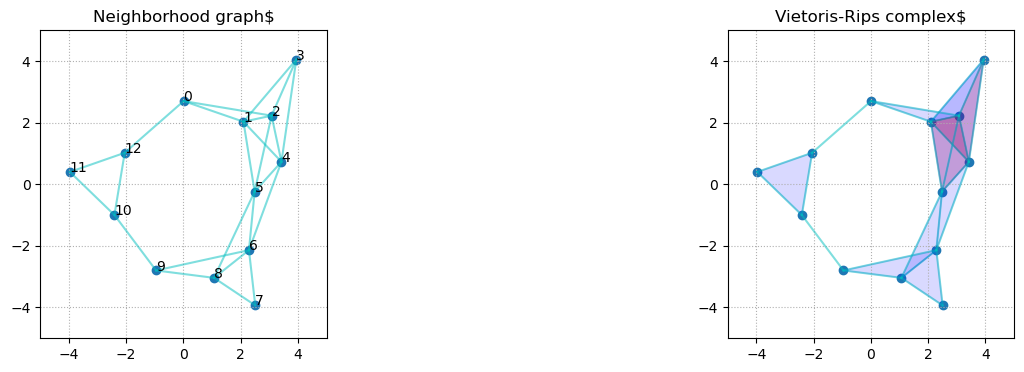

Graph with 13 nodes and 25 edges
13 2
VRC destructor


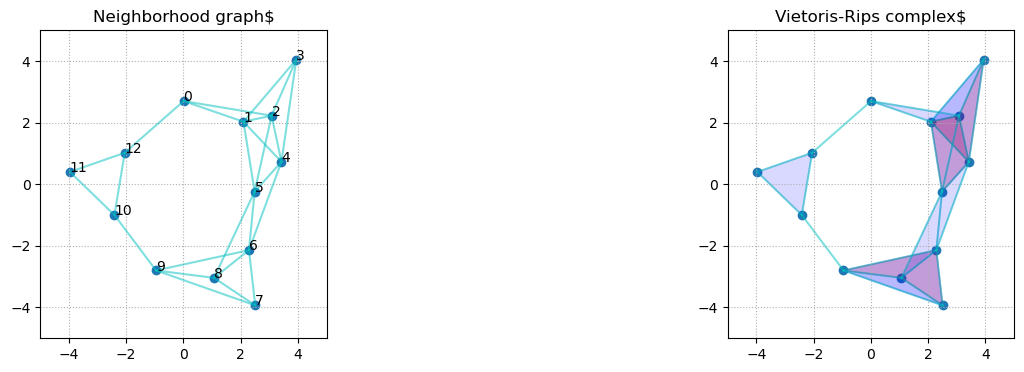

Graph with 13 nodes and 27 edges
13 2
VRC destructor


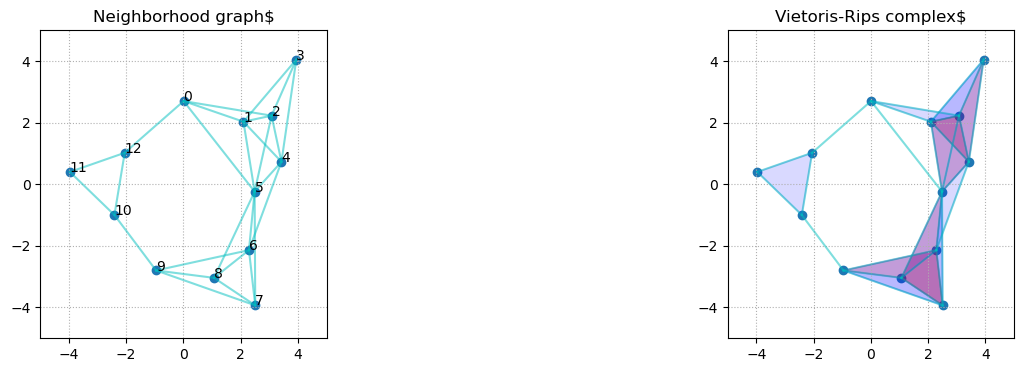

Graph with 13 nodes and 28 edges
13 2
VRC destructor


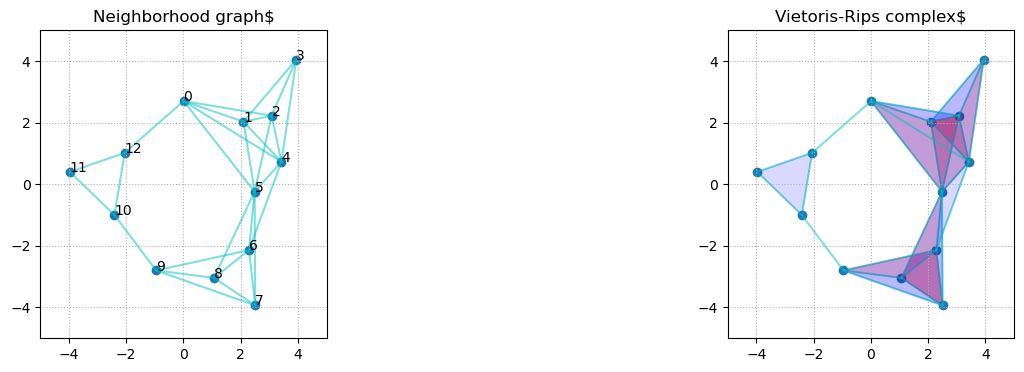

Graph with 13 nodes and 29 edges
13 2
VRC destructor


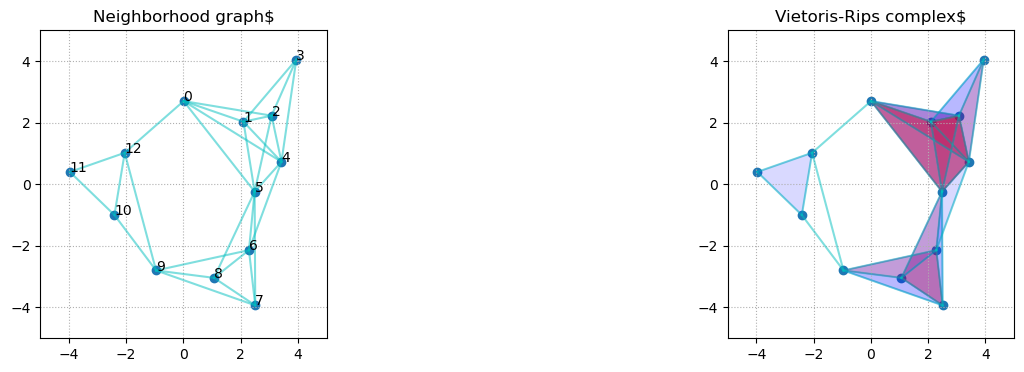

Graph with 13 nodes and 30 edges
13 2
VRC destructor


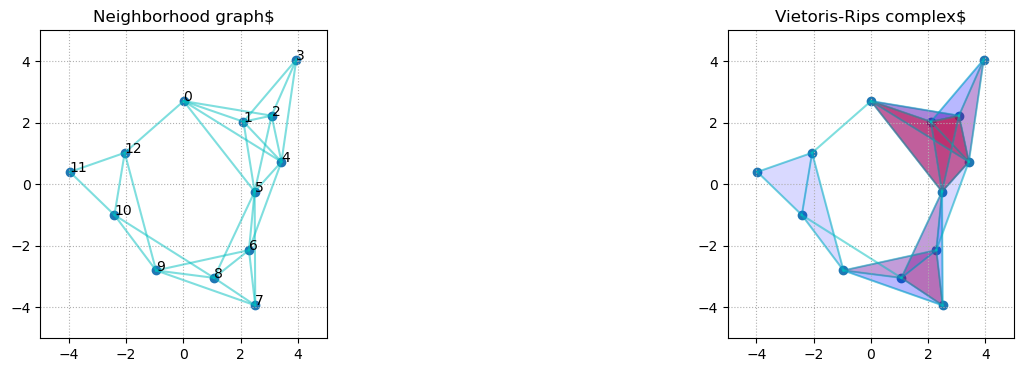

Graph with 13 nodes and 31 edges
13 2
VRC destructor


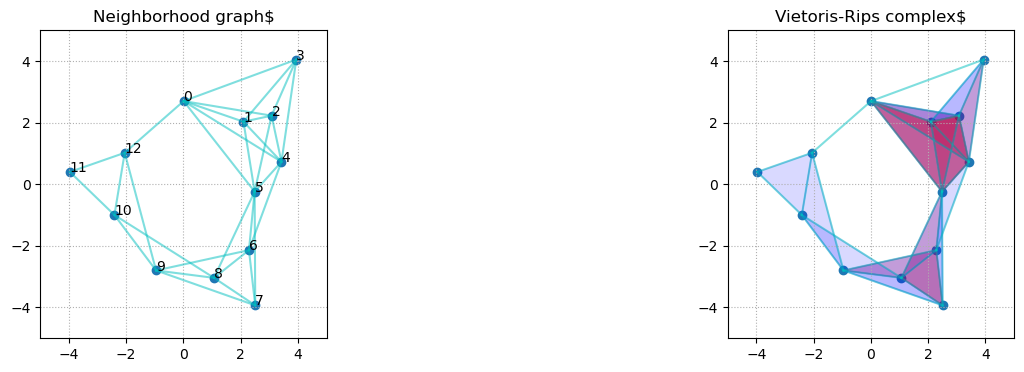

Graph with 13 nodes and 32 edges
13 2
VRC destructor


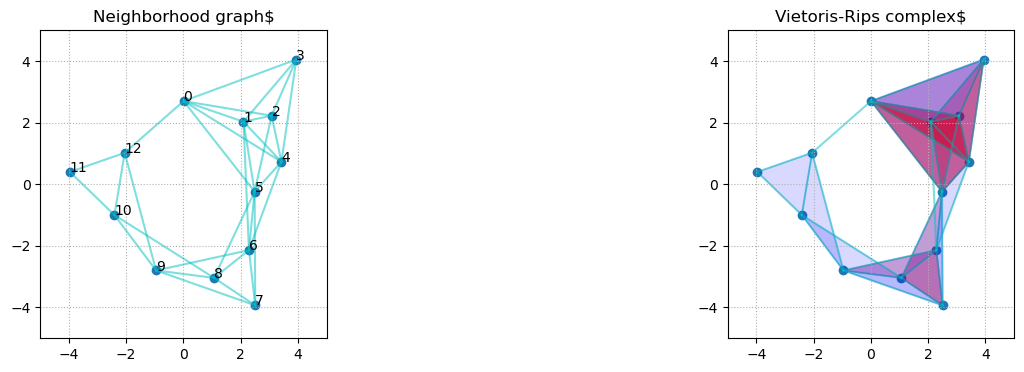

In [ ]:
__K = 0

for epsilon in epsilons:
    _A = radius_neighbors_graph(X, epsilon, mode='distance', include_self=False).toarray() #.astype(int)

    _G = nx.from_numpy_array(_A)

    _M = _A.copy()
    np.fill_diagonal(_M, 1)

    print(_G)
    _A = _A.astype(np.float32)
    # __K = gf.get_VR_from_dist_matrix(_A, 4)
    __K = gf.get_VR_from_coord_matrix(X, epsilon, 4)
    _K =  __K.as_list()
    # print("Core graph V: {}".format(nx.nodes(_CG)))
    # print("Core graph E: {}".format(nx.edges(_CG)))
    # print("\r\nCore cmplx V: {}".format(_CK[0]))
    # if len(_CK) > 1:
    #     print("Core cmplx E: {}".format(_CK[1]))
    # else:
    #     print("Core cmplx E: []")
    # print("_K", _K)
    plot_core(_G, _K)
    # type(__K)
# type(__K)